In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.plots import plot_training_curves

In [3]:
results70 = pd.read_csv("ActivityLong70N.csv")
results700 = pd.read_csv("ActivityLong700N.csv")
results7000 = pd.read_csv("ActivityLong7000N.csv")

In [4]:
results7000

,model,setting,experiment_name,seq_len,pred_len,label_len,mse,mae,rmse,mape,mspe,rse,corr
0,Naive,Naive_48_16_Naive_Activity_ftM_sl48_pl16_Exp,ActivityLong7000N,48,16,16,0.044829,0.156447,0.211729,3.184451,1477766.0,1.097668,[]
1,Mean,Mean_48_16_Mean_Activity_ftM_sl48_pl16_Exp,ActivityLong7000N,48,16,16,0.027608,0.120992,0.166158,3.240088,1393441.9,0.861410,[]
2,TSMixer,TSMixer_48_16_TSMixer_Activity_ftM_sl48_ll16_p...,ActivityLong7000N,48,16,16,0.025786,0.116206,0.160579,3.079153,1342504.4,0.832489,[0.06933818 0.06764039 0.06667595 0.0651651 0...
3,POCO,POCO_48_16_POCO_Activity_ftM_sl48_ll16_pl16_dm...,ActivityLong7000N,48,16,16,0.025493,0.114827,0.159666,3.161871,1499126.6,0.827756,[0.06791434 0.0664338 0.06521115 0.06396108 0...
4,Linear,Linear_48_16_Linear_Activity_ftM_sl48_ll16_pl1...,ActivityLong7000N,48,16,16,0.026534,0.118607,0.162892,3.131707,1373989.9,0.844478,[0.07815997 0.07376431 0.07048838 0.06924136 0...
5,DLinear,DLinear_48_16_DLinear_Activity_ftM_sl48_ll16_p...,ActivityLong7000N,48,16,16,0.026358,0.118169,0.162351,3.121584,1345641.9,0.841676,[0.07877978 0.07576296 0.07261233 0.06925008 0...
6,Informer,Informer_48_16_Informer_Activity_ftM_sl48_ll16...,ActivityLong7000N,48,16,16,0.027642,0.118725,0.166259,3.258053,1433100.6,0.861935,[0.05377088 0.05301566 0.05225244 0.05118956 0...
7,Transformer,Transformer_48_16_Transformer_Activity_ftM_sl4...,ActivityLong7000N,48,16,16,0.027420,0.118392,0.165591,3.304228,1572307.4,0.858473,[0.05999454 0.05559058 0.05405618 0.05244996 0...


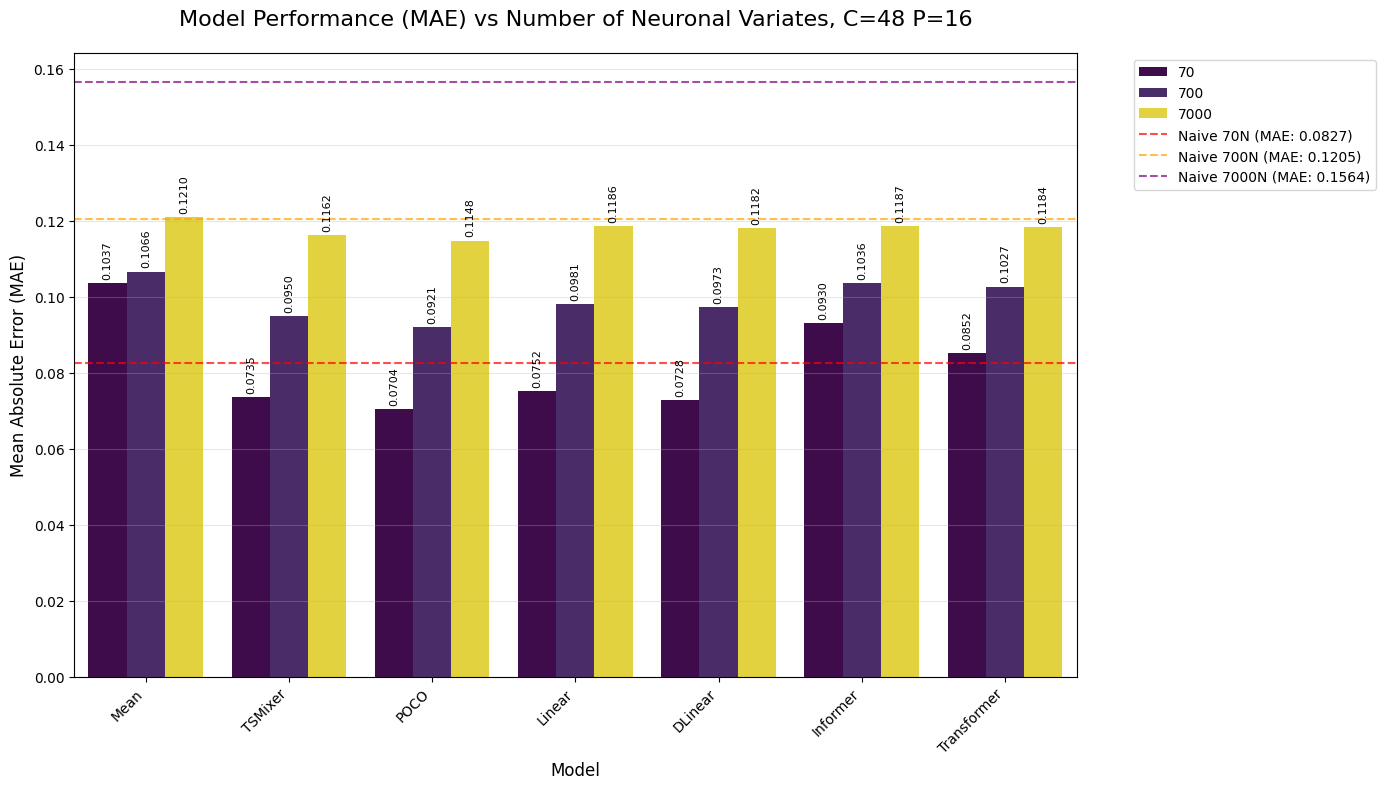


Summary: Model Performance by Number of Neurons
neurons        70      700     7000
model                              
DLinear      0.0728  0.0973  0.1182
Informer     0.0930  0.1036  0.1187
Linear       0.0752  0.0981  0.1186
Mean         0.1037  0.1066  0.1210
Naive        0.0827  0.1205  0.1564
POCO         0.0704  0.0921  0.1148
TSMixer      0.0735  0.0950  0.1162
Transformer  0.0852  0.1027  0.1184

Performance improvement with more covariates (MAE reduction from 70 to 7000 neurons):
Mean        : 0.1037 → 0.1210 (-16.7%)
POCO        : 0.0704 → 0.1148 (-63.1%)
TSMixer     : 0.0735 → 0.1162 (-58.0%)
Linear      : 0.0752 → 0.1186 (-57.6%)
DLinear     : 0.0728 → 0.1182 (-62.2%)
Informer    : 0.0930 → 0.1187 (-27.6%)
Transformer : 0.0852 → 0.1184 (-38.9%)


In [10]:
# Compare model performance across different numbers of neurons (covariates)
# Combine all datasets and add neuron count information
results_combined = pd.concat([
    results70.assign(neurons=70),
    results700.assign(neurons=700), 
    results7000.assign(neurons=7000)
], ignore_index=True)

# Create comparison plot
plt.figure(figsize=(14, 8))

# Get models excluding Naive for grouped bar plot
models_to_plot = ['Mean', 'POCO', 'TSMixer', 'Linear', 'DLinear', 'Informer', 'Transformer']
plot_data = results_combined[results_combined['model'].isin(models_to_plot)]

# Create grouped bar plot
ax = sns.barplot(data=plot_data, x='model', y='mae', hue='neurons', palette='viridis')

# Add Naive reference lines for each neuron count
naive_70 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 70)]['mae'].iloc[0]
naive_700 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 700)]['mae'].iloc[0]
naive_7000 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 7000)]['mae'].iloc[0]

plt.axhline(y=naive_70, color='red', linestyle='--', linewidth=1.5, alpha=0.7, 
            label=f'Naive 70N (MAE: {naive_70:.4f})')
plt.axhline(y=naive_700, color='orange', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Naive 700N (MAE: {naive_700:.4f})')  
plt.axhline(y=naive_7000, color='purple', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Naive 7000N (MAE: {naive_7000:.4f})')

# Styling
plt.title('Model Performance (MAE) vs Number of Neuronal Variates, C=48 P=16', fontsize=16, fontweight='medium', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='medium')
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12, fontweight='medium')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', rotation=90, padding=3, fontsize=8)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary: Model Performance by Number of Neurons")
print("=" * 50)
summary = results_combined.groupby(['model', 'neurons'])['mae'].first().unstack(level=1)
print(summary.round(4))

print("\nPerformance improvement with more covariates (MAE reduction from 70 to 7000 neurons):")
print("=" * 70)
for model in models_to_plot:
    mae_70 = summary.loc[model, 70]
    mae_7000 = summary.loc[model, 7000]
    improvement = (mae_70 - mae_7000) / mae_70 * 100
    print(f"{model:12}: {mae_70:.4f} → {mae_7000:.4f} ({improvement:+.1f}%)")

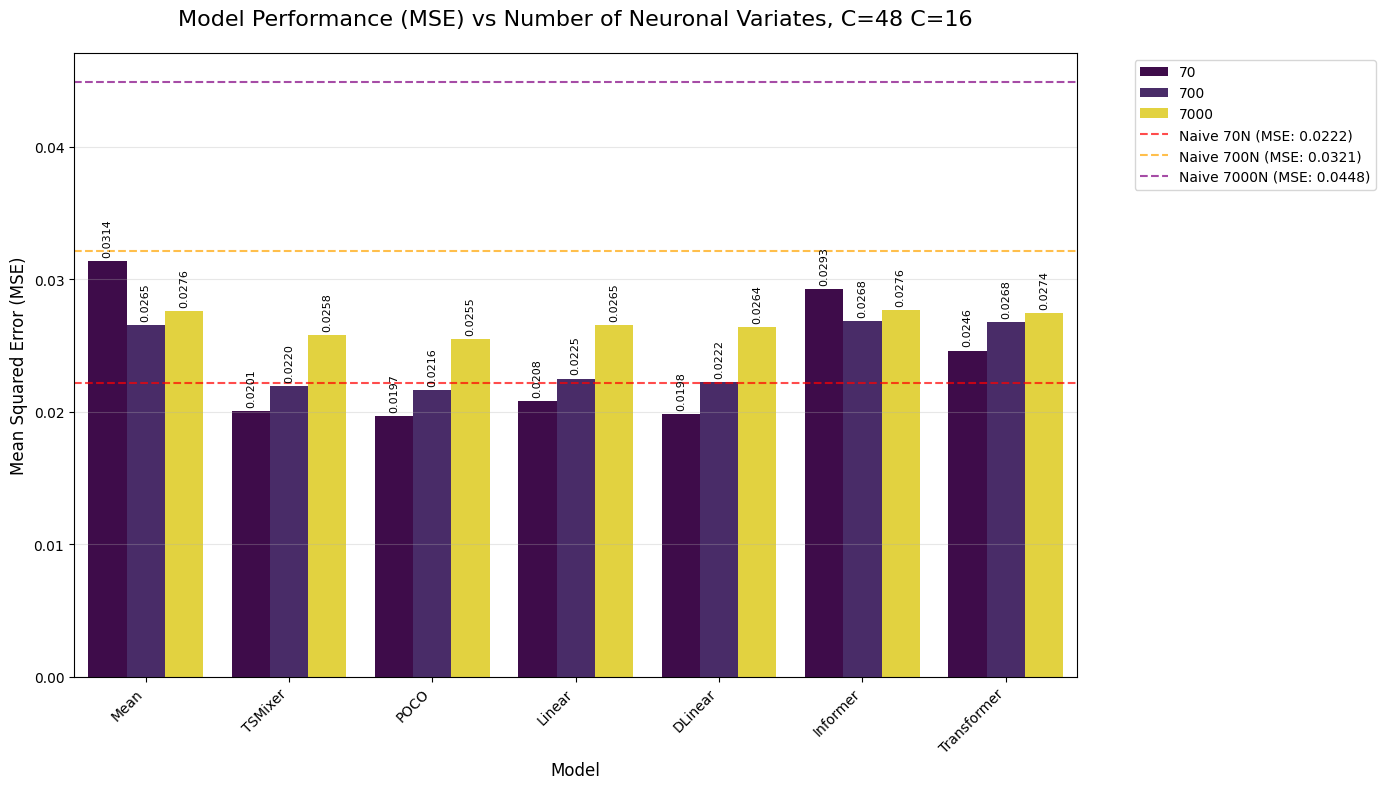

In [8]:
# Compare model performance across different numbers of neurons (covariates)
# Combine all datasets and add neuron count information
results_combined = pd.concat([
    results70.assign(neurons=70),
    results700.assign(neurons=700), 
    results7000.assign(neurons=7000)
], ignore_index=True)

# Create comparison plot
plt.figure(figsize=(14, 8))

# Get models excluding Naive for grouped bar plot
models_to_plot = ['Mean', 'POCO', 'TSMixer', 'Linear', 'DLinear', 'Informer', 'Transformer']
plot_data = results_combined[results_combined['model'].isin(models_to_plot)]

# Create grouped bar plot
ax = sns.barplot(data=plot_data, x='model', y='mse', hue='neurons', palette='viridis')

# Add Naive reference lines for each neuron count
naive_70 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 70)]['mse'].iloc[0]
naive_700 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 700)]['mse'].iloc[0]
naive_7000 = results_combined[(results_combined['model'] == 'Naive') & (results_combined['neurons'] == 7000)]['mse'].iloc[0]

plt.axhline(y=naive_70, color='red', linestyle='--', linewidth=1.5, alpha=0.7, 
            label=f'Naive 70N (MSE: {naive_70:.4f})')
plt.axhline(y=naive_700, color='orange', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Naive 700N (MSE: {naive_700:.4f})')  
plt.axhline(y=naive_7000, color='purple', linestyle='--', linewidth=1.5, alpha=0.7,
            label=f'Naive 7000N (MSE: {naive_7000:.4f})')

# Styling
plt.title('Model Performance (MSE) vs Number of Neuronal Variates, C=48 C=16', fontsize=16, fontweight='medium', pad=20)
plt.xlabel('Model', fontsize=12, fontweight='medium')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight='medium')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', rotation=90, padding=3, fontsize=8)

plt.tight_layout()
plt.show()

Using y-axis maximum: 0.1564


/tmp/ipykernel_29954/2689624488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='model', y='mae', palette='viridis', ax=ax)
/tmp/ipykernel_29954/2689624488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='model', y='mae', palette='viridis', ax=ax)
/tmp/ipykernel_29954/2689624488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_data, x='model', y='mae', palette='viridis', ax=ax)


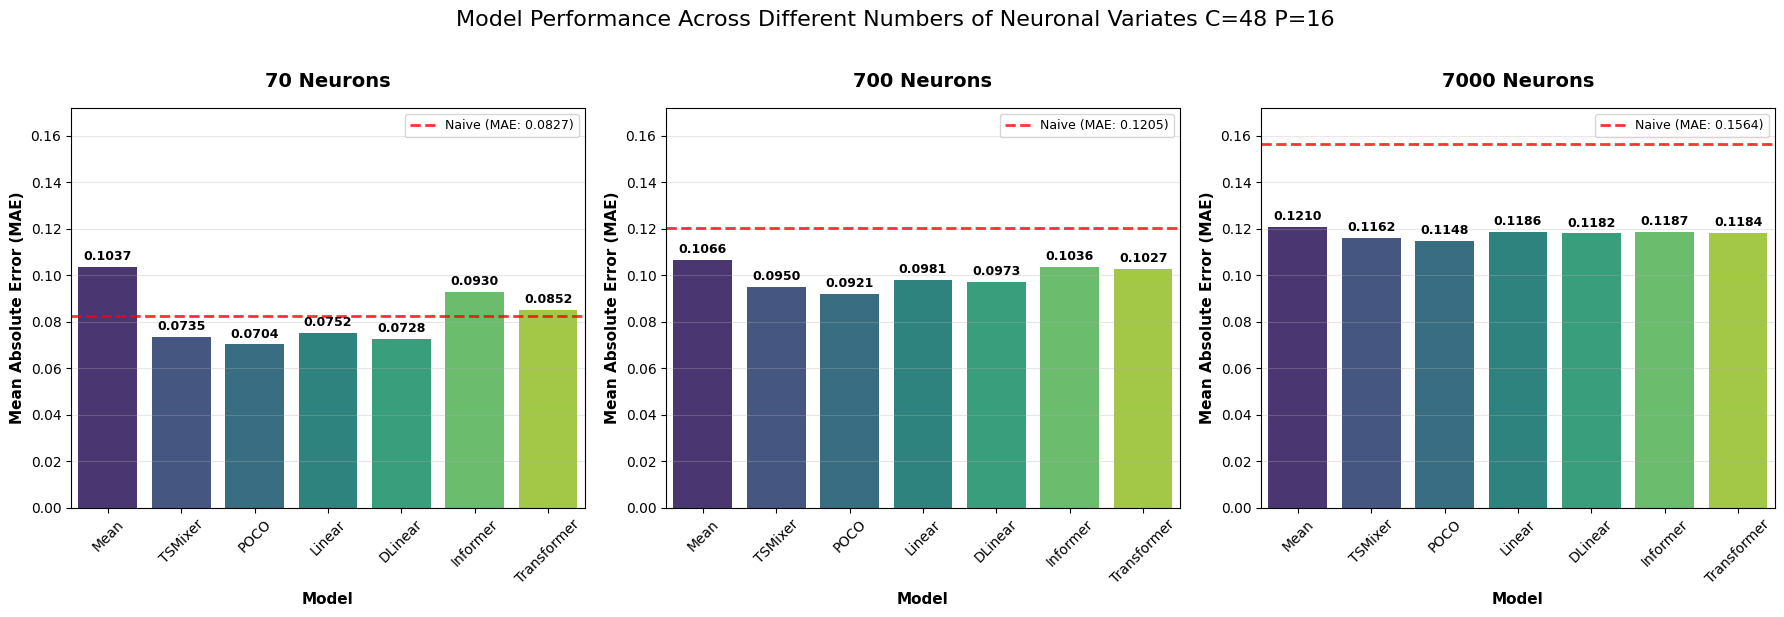


Summary: Model Performance by Number of Neurons
neurons        70      700     7000
model                              
DLinear      0.0728  0.0973  0.1182
Informer     0.0930  0.1036  0.1187
Linear       0.0752  0.0981  0.1186
Mean         0.1037  0.1066  0.1210
Naive        0.0827  0.1205  0.1564
POCO         0.0704  0.0921  0.1148
TSMixer      0.0735  0.0950  0.1162
Transformer  0.0852  0.1027  0.1184


In [9]:
# Split into three separate subplots for cleaner visualization
def plot_neuron_comparison(results_data, neuron_count, ax, y_max=None, title_suffix=""):
    """Plot model performance for a specific neuron count"""
    
    # Get models excluding Naive for bar plot
    models_to_plot = ['Mean', 'POCO', 'TSMixer', 'Linear', 'DLinear', 'Informer', 'Transformer']
    plot_data = results_data[results_data['model'].isin(models_to_plot)]
    
    # Create bar plot
    sns.barplot(data=plot_data, x='model', y='mae', palette='viridis', ax=ax)
    
    # Add Naive reference line
    naive_mae = results_data[results_data['model'] == 'Naive']['mae'].iloc[0]
    ax.axhline(y=naive_mae, color='red', linestyle='--', linewidth=2, alpha=0.8,
               label=f'Naive (MAE: {naive_mae:.4f})')
    
    # Set consistent y-axis limits
    if y_max is not None:
        ax.set_ylim(0, y_max * 1.1)  # Add 10% padding
    
    # Styling
    ax.set_title(f'{neuron_count} Neurons{title_suffix}', fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Model', fontsize=11, fontweight='bold')
    ax.set_ylabel('Mean Absolute Error (MAE)', fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.legend(fontsize=9)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(plot_data['mae']):
        ax.text(i, v + y_max * 0.01, f'{v:.4f}', ha='center', va='bottom', 
                fontweight='bold', fontsize=9)
    
    return ax

# Find the maximum MAE across all datasets to set consistent y-axis
all_datasets = [results70, results700, results7000]
max_mae = max([df['mae'].max() for df in all_datasets])
print(f"Using y-axis maximum: {max_mae:.4f}")

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each neuron count with consistent y-axis
plot_neuron_comparison(results70, 70, axes[0], y_max=max_mae)
plot_neuron_comparison(results700, 700, axes[1], y_max=max_mae) 
plot_neuron_comparison(results7000, 7000, axes[2], y_max=max_mae)

# Overall title
fig.suptitle('Model Performance Across Different Numbers of Neuronal Variates C=48 P=16', 
             fontsize=16, fontweight='medium', y=1.02)

plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary: Model Performance by Number of Neurons")
print("=" * 50)
results_combined = pd.concat([
    results70.assign(neurons=70),
    results700.assign(neurons=700), 
    results7000.assign(neurons=7000)
], ignore_index=True)

summary = results_combined.groupby(['model', 'neurons'])['mae'].first().unstack(level=1)
print(summary.round(4))

In [10]:
# Calculate model performance improvement as percentage change from Naive baseline
print("Percentage Improvement Calculation:")
print("Formula: ((Naive_MAE - Model_MAE) / Naive_MAE) × 100")
print("Positive values = improvement over Naive, Negative values = worse than Naive")
print("=" * 70)

# Create combined dataset
results_combined = pd.concat([
    results70.assign(neurons=70),
    results700.assign(neurons=700), 
    results7000.assign(neurons=7000)
], ignore_index=True)

# Get the summary table (MAE values)
summary = results_combined.groupby(['model', 'neurons'])['mae'].first().unstack(level=1)

# Calculate percentage improvement from Naive baseline
improvement_df = pd.DataFrame(index=summary.index, columns=summary.columns)

for neuron_count in [70, 700, 7000]:
    naive_mae = summary.loc['Naive', neuron_count]
    
    for model in summary.index:
        if model != 'Naive':
            model_mae = summary.loc[model, neuron_count]
            # Calculate percentage improvement: (naive - model) / naive * 100
            improvement = ((naive_mae - model_mae) / naive_mae) * 100
            improvement_df.loc[model, neuron_count] = improvement
        else:
            improvement_df.loc[model, neuron_count] = 0.0  # Naive baseline is 0%

# Convert to numeric and round
improvement_df = improvement_df.astype(float).round(2)

print(f"\nPercentage Improvement over Naive Baseline:")
print("=" * 50)
print("Model Performance Improvement (%)")
print(improvement_df)

print(f"\nRaw MAE Values for Reference:")
print("=" * 35)
print(summary.round(4))

# Identify best performing models for each neuron count
print(f"\nBest Performing Models:")
print("=" * 25)
for neuron_count in [70, 700, 7000]:
    # Exclude Naive from best model selection
    non_naive = improvement_df.drop('Naive').iloc[:, improvement_df.columns.get_loc(neuron_count)]
    best_model = non_naive.idxmax()
    best_improvement = non_naive.max()
    print(f"{neuron_count:4} neurons: {best_model:12} (+{best_improvement:5.2f}%)")

# Show which models benefit most from additional covariates
print(f"\nImprovement Gained from 70 → 7000 neurons:")
print("=" * 45)
improvement_70_to_7000 = improvement_df[7000] - improvement_df[70]
improvement_70_to_7000_sorted = improvement_70_to_7000.drop('Naive').sort_values(ascending=False)

for model, gain in improvement_70_to_7000_sorted.items():
    print(f"{model:12}: {improvement_df.loc[model, 70]:+6.2f}% → {improvement_df.loc[model, 7000]:+6.2f}% (Δ{gain:+5.2f}%)")

Percentage Improvement Calculation:
Formula: ((Naive_MAE - Model_MAE) / Naive_MAE) × 100
Positive values = improvement over Naive, Negative values = worse than Naive

Percentage Improvement over Naive Baseline:
Model Performance Improvement (%)
neurons       70     700    7000
model                           
DLinear       9.24  17.32  22.60
Informer    -13.78   9.83  22.08
Linear        4.23  15.00  20.66
Mean        -24.72  10.41  20.82
Naive         0.00   0.00   0.00
POCO         13.37  21.74  25.65
TSMixer       8.82  18.79  23.27
Transformer  -4.42  10.55  22.25

Raw MAE Values for Reference:
neurons        70      700     7000
model                              
DLinear      0.0593  0.0919  0.1174
Informer     0.0744  0.1002  0.1182
Linear       0.0626  0.0945  0.1203
Mean         0.0815  0.0996  0.1201
Naive        0.0654  0.1112  0.1517
POCO         0.0566  0.0870  0.1128
TSMixer      0.0596  0.0903  0.1164
Transformer  0.0683  0.0994  0.1179

Best Performing Models:
  70 neur

Plot saved to: training_curves.png


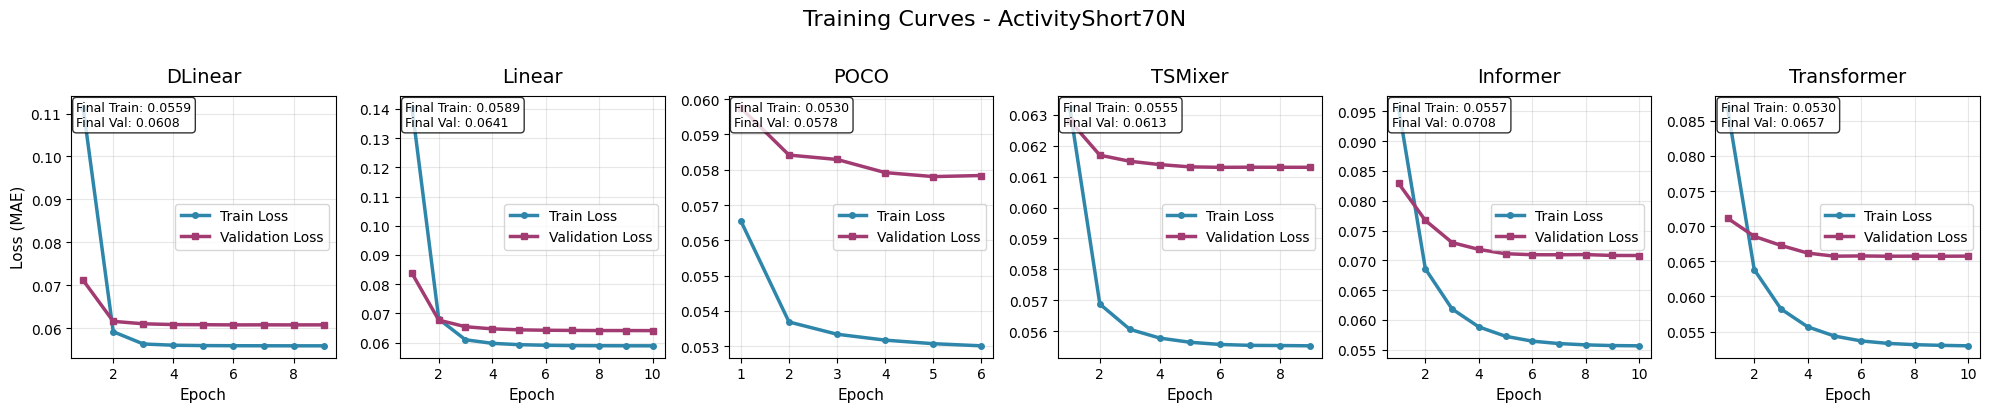

In [ ]:
plot_training_curves('ActivityShort70N', models=['DLinear', "Linear", 'POCO', 'TSMixer', "Informer", "Transformer"], save_path='training_curves.png')